<a href="https://colab.research.google.com/github/noh-yujeong/SPARTACODING_education_content/blob/main/4%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_01_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='yujeongnoh'
os.environ['KAGGLE_KEY']='f1f98ae96b1b8d5a2f0bcee2be4fd59e'

In [ ]:
#0. 데이터 셋 다운로드하기

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
#1. 필요한 package importing하기
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D, MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#2. 데이터 셋 loading 하기
train_df=pd.read_csv('sign_mnist_train.csv')
test_df=pd.read_csv('sign_mnist_test.csv')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


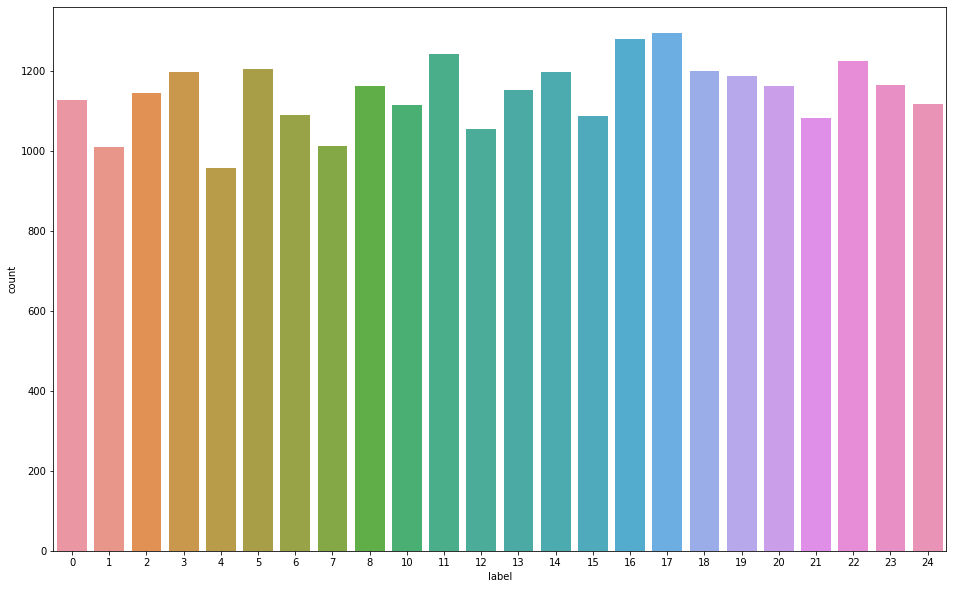

In [ ]:
#3. label 분포 확인하기
plt.figure(figsize=(16,10))
sns.countplot(train_df['label'])
plt.show()

In [ ]:
#4. 전처리
###4-1.입력(input)과 출력(output)나누기

train_df= train_df.astype(np.float32)

x_train= train_df.drop(columns=['label'],axis=1).values
x_train= x_train.reshape((-1,28,28,1))
y_train= train_df[['label']].values

test_df=test_df.astype(np.float32)
x_test=test_df.drop(columns=['label'],axis=1).values
x_test=x_test.reshape((-1,28,28,1))
y_test=test_df[['label']].values

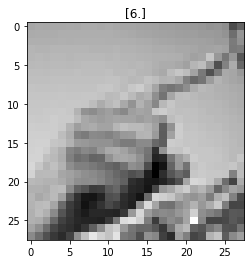

In [ ]:
###4-2. 데이터 미리보기
index=1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [ ]:
#5. 원핫인코딩

encoder=OneHotEncoder()
y_train=encoder.fit_transform(y_train).toarray()
y_test=encoder.fit_transform(y_test).toarray()


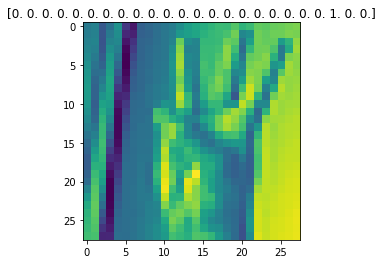

In [ ]:
#6. 일반화하기
train_image_datagen=ImageDataGenerator(
    rescale=1./255. #일반화
)

train_datagen=train_image_datagen.flow(
    x=x_train,
    y=y_train,
    batch_size=256,
    shuffle=True
)

test_image_datagen=ImageDataGenerator(
    rescale=1./255.
)

test_datagen=test_image_datagen.flow(
    x=x_test,
    y=y_test,
    batch_size=256,
    shuffle=False
)

index=1

preview_img=train_datagen.__getitem__(0)[0][index]
preview_label=train_datagen.__getitem__(0)[1][index]

plt.imshow(preview_img.reshape((28,28)))
plt.title(str(preview_label))
plt.show()

In [17]:
#7. network 구성하기
input=Input(shape=(28,28,1))

hidden=Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu')(input)
hidden=MaxPooling2D(pool_size=2,strides=2)(hidden)

hidden=Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(hidden)
hidden=MaxPooling2D(pool_size=2,strides=2)(hidden)

hidden=Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu')(hidden)
hidden=MaxPooling2D(pool_size=2,strides=2)(hidden)

hidden=Flatten()(hidden)
hidden=Dropout(rate=0.3)(hidden)
output=Dense(24,activation='softmax')(hidden)
model=Model(inputs=input,outputs=output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
#8. 모델 학습
history=model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=20
)

Epoch 1/20
108/108 [==============================] - 33s 15ms/step - loss: 2.6603 - acc: 0.2173 - val_loss: 1.5460 - val_acc: 0.5417
Epoch 2/20
108/108 [==============================] - 1s 12ms/step - loss: 1.0382 - acc: 0.6622 - val_loss: 0.6759 - val_acc: 0.7775
Epoch 3/20
108/108 [==============================] - 1s 12ms/step - loss: 0.5533 - acc: 0.8139 - val_loss: 0.4377 - val_acc: 0.8416
Epoch 4/20
108/108 [==============================] - 1s 12ms/step - loss: 0.3739 - acc: 0.8761 - val_loss: 0.3294 - val_acc: 0.8992
Epoch 5/20
108/108 [==============================] - 1s 12ms/step - loss: 0.2668 - acc: 0.9128 - val_loss: 0.2890 - val_acc: 0.8967
Epoch 6/20
108/108 [==============================] - 1s 12ms/step - loss: 0.2055 - acc: 0.9343 - val_loss: 0.2340 - val_acc: 0.9255
Epoch 7/20
108/108 [==============================] - 1s 12ms/step - loss: 0.1604 - acc: 0.9478 - val_loss: 0.2242 - val_acc: 0.9239
Epoch 8/20
108/108 [==============================] - 1s 12ms/step -

In [21]:
"""
이미지 증강기법 이용해보기
"""
#1. train data 증강하기

train_imagwe_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

train_datagen=train_image_datagen.flow(
    x=x_train,
    y=y_train,
    batch_size=256,
    shuffle=True
)

In [22]:
#2. validation data 일반화하기

test_image_datagen=ImageDataGenerator(
    rescale=1./255
)

test_datagen=test_image_datagen.flow(
    x=x_test,
    y=y_test,
    batch_size=256,
    shuffle=False
)

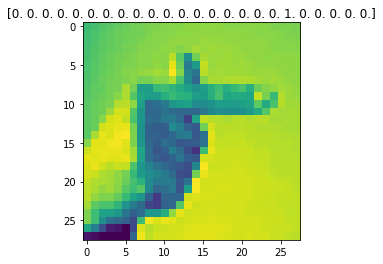

In [23]:
#3. 이미지 확인하기
index=1

preview_img=train_datagen.__getitem__(0)[0][index]
preview_label=train_datagen.__getitem__(0)[1][index]

plt.imshow(preview_img.reshape((28,28)))
plt.title(str(preview_label))
plt.show()

In [24]:
#4. network 구성하기

input=Input(shape=(28,28,1))

hidden=Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu')(input)
hidden=MaxPooling2D(pool_size=2,strides=2)(hidden)

hidden=Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(hidden)
hidden=MaxPooling2D(pool_size=2,strides=2)(hidden)

hidden=Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu')(hidden)
hidden=MaxPooling2D(pool_size=2,strides=2)(hidden)

hidden=Flatten()(hidden)

hidden=Dense(512,activation='relu')(hidden)
hidden=Dropout(rate=0.3)(hidden)

output=Dense(24,activation='softmax')(hidden)

model=Model(inputs=input,outputs=output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
#5. 모델 학습시키기
history=model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=20
)

Epoch 1/20
108/108 [==============================] - 2s 14ms/step - loss: 2.0746 - acc: 0.3726 - val_loss: 0.9384 - val_acc: 0.7054
Epoch 2/20
108/108 [==============================] - 1s 12ms/step - loss: 0.5231 - acc: 0.8267 - val_loss: 0.4049 - val_acc: 0.8772
Epoch 3/20
108/108 [==============================] - 1s 13ms/step - loss: 0.1787 - acc: 0.9456 - val_loss: 0.2471 - val_acc: 0.9329
Epoch 4/20
108/108 [==============================] - 1s 12ms/step - loss: 0.0775 - acc: 0.9783 - val_loss: 0.1932 - val_acc: 0.9360
Epoch 5/20
108/108 [==============================] - 1s 12ms/step - loss: 0.0384 - acc: 0.9911 - val_loss: 0.2113 - val_acc: 0.9420
Epoch 6/20
108/108 [==============================] - 1s 12ms/step - loss: 0.0207 - acc: 0.9964 - val_loss: 0.2032 - val_acc: 0.9557
Epoch 7/20
108/108 [==============================] - 1s 12ms/step - loss: 0.0156 - acc: 0.9967 - val_loss: 0.2084 - val_acc: 0.9522
Epoch 8/20
108/108 [==============================] - 1s 12ms/step - 